• **DOMAIN**: Semiconductor manufacturing process

• **CONTEXT**: A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise.Engineers typically have a much larger number of signals that are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

• **DATA DESCRIPTION**: sensor-data.csv : (1567, 592)
The data consists of 1567 datapoints each with 591 features.The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

• **PROJECT OBJECTIVE**: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

### Steps and tasks:

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from scipy import stats
from sklearn.preprocessing import MinMaxScaler

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from collections import Counter

from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV 

from sklearn.utils import resample

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline, make_pipeline

import pickle 

import warnings
warnings.filterwarnings("ignore")

#### 1. Import and understand the data.

##### A. Import ‘signal-data.csv’ as DataFrame.

In [2]:
data = pd.read_csv('D:/Nikhila/PGP - AIML/2. Projects/5. Featurization, Model Selection and Tuning/signal-data.csv')

print('Shape of the original Dataframe', data.shape)

Shape of the original Dataframe (1567, 592)


##### B. Print 5 point summary and share at least 2 observations.

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.21440,1591.223500,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.31680,1.525700,1114.5366
5,1553.0,100.000000,0.000000,100.0000,100.000000,100.00000,100.000000,100.0000
6,1553.0,101.112908,6.237214,82.1311,97.920000,101.51220,104.586700,129.2522
7,1558.0,0.121822,0.008961,0.0000,0.121100,0.12240,0.123800,0.1286
8,1565.0,1.462862,0.073897,1.1910,1.411200,1.46160,1.516900,1.6564
9,1565.0,-0.000841,0.015116,-0.0534,-0.010800,-0.00130,0.008400,0.0749


**Observation** - 
- The count of each column is different, indicating the **presence of missing values**.
- Mean and Median values are approximately same for all the columns i.e, **Data is Normally distributed**.
- We have difference between the 75% value and max value, indicating **skewness in the data** and **presence of outliers**

#### 2. Data cleansing:

##### A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [4]:
# Drop 'Time' column to run the for loop
data_time = data[['Time']]
data.drop('Time', axis=1, inplace=True)

In [5]:
#remove all the features with 20%+ Null values 
missing_value_columns = data.columns[data.isna().mean() >= 0.20]
data = data.drop(missing_value_columns, axis=1)
    
#impute rest with mean of the feature using for loop.
for column in data.columns:
    data[column] = data[column].fillna(data[column].mean())

In [6]:
print('Shape of the dataframe after removing all the features with 20%+ Null values and imputing rest with mean of the feature', data.shape)

Shape of the dataframe after removing all the features with 20%+ Null values and imputing rest with mean of the feature (1567, 559)


**Observation** - We have reduced the count of features from 592 to 559

##### B. Identify and drop the features which are having same value for all the rows.

In [7]:
#Loop through features
for col in data.columns: 
  if len(data[col].unique()) == 1:  # Find unique values in features along with their length and if len is == 1 then it contains same values
    data.drop([col], axis=1, inplace=True)  # Drop the column

In [8]:
print('Shape of the dataframe after removing the features with same value for all the rows', data.shape)

Shape of the dataframe after removing the features with same value for all the rows (1567, 443)


**Observation** - We have reduced the count of features from 559 to 443

##### C. Drop other features if required using relevant functional knowledge. Clearly justify the same.

###### Remove collinear features in a dataframe
Remove collinear features in a dataframe with a correlation coefficient greater than the threshold. This can help a model to generalize and improves the interpretability of the model.

In [9]:
def collinear_features(x, threshold):
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x               

In [10]:
#Remove columns having more than 70% correlation (strong correlation)
#Both positive and negative correlations are considered here
data = collinear_features(data,0.70) 

17 | 11 | 0.79
22 | 21 | 0.73
26 | 25 | 0.82
27 | 25 | 0.98
27 | 26 | 0.79
30 | 29 | 0.86
34 | 32 | 0.75
35 | 34 | 0.77
36 | 32 | 0.75
36 | 34 | 1.0
36 | 35 | 0.77
39 | 34 | 0.8
39 | 36 | 0.8
46 | 45 | 0.81
50 | 46 | 0.9
51 | 47 | 0.71
54 | 53 | 0.94
60 | 43 | 0.9
60 | 50 | 0.7
65 | 64 | 0.84
66 | 46 | 0.82
66 | 50 | 0.76
70 | 46 | 0.8
70 | 50 | 0.77
70 | 62 | 0.73
70 | 66 | 0.9
96 | 94 | 0.96
98 | 94 | 0.84
98 | 96 | 0.87
101 | 94 | 0.73
101 | 96 | 0.79
101 | 98 | 0.91
104 | 99 | 0.99
105 | 92 | 0.99
106 | 93 | 0.99
123 | 121 | 0.94
124 | 121 | 0.89
124 | 123 | 0.86
125 | 122 | 0.71
127 | 122 | 0.96
130 | 122 | 0.83
130 | 127 | 0.79
140 | 4 | 1.0
147 | 16 | 0.89
148 | 16 | 0.97
148 | 147 | 0.89
152 | 16 | 0.98
152 | 147 | 0.9
152 | 148 | 0.99
154 | 16 | 0.87
154 | 147 | 0.8
154 | 148 | 0.94
154 | 152 | 0.89
155 | 19 | 0.81
163 | 26 | 0.71
163 | 159 | 0.76
164 | 26 | 0.77
164 | 159 | 0.8
164 | 163 | 0.92
165 | 26 | 0.74
165 | 159 | 0.79
165 | 163 | 0.9
165 | 164 | 0.96
174 | 172 | 1.0


443 | 172 | 1.0
443 | 174 | 1.0
443 | 307 | 0.96
443 | 309 | 0.96
444 | 173 | 0.99
444 | 308 | 0.95
445 | 172 | 1.0
445 | 174 | 1.0
445 | 307 | 0.96
445 | 309 | 0.96
445 | 443 | 0.99
446 | 175 | 1.0
446 | 310 | 0.95
447 | 176 | 1.0
447 | 311 | 0.98
448 | 177 | 1.0
448 | 312 | 1.0
452 | 180 | 0.99
452 | 316 | 0.86
453 | 181 | 1.0
453 | 317 | 0.96
454 | 182 | 0.99
454 | 318 | 0.97
455 | 183 | 1.0
455 | 319 | 0.98
456 | 184 | 0.97
456 | 185 | 0.71
456 | 320 | 0.96
456 | 321 | 0.72
457 | 185 | 1.0
457 | 187 | 0.81
457 | 320 | 0.7
457 | 321 | 0.99
457 | 323 | 0.8
457 | 456 | 0.71
459 | 185 | 0.82
459 | 187 | 1.0
459 | 321 | 0.82
459 | 323 | 0.99
459 | 457 | 0.81
467 | 195 | 1.0
467 | 331 | 0.95
469 | 67 | 0.87
469 | 196 | 0.9
469 | 197 | 1.0
469 | 198 | 0.72
469 | 199 | 0.83
469 | 203 | 0.71
469 | 204 | 0.81
469 | 205 | 0.85
469 | 207 | 0.88
469 | 332 | 0.92
469 | 333 | 0.99
469 | 334 | 0.77
469 | 335 | 0.88
469 | 336 | 0.91
469 | 340 | 0.82
469 | 341 | 0.86
469 | 343 | 0.89
470 | 198 | 1.0

In [11]:
print('Shape of the dataframe after removing the features having more than 70% correlation', data.shape)

Shape of the dataframe after removing the features having more than 70% correlation (1567, 202)


**Observation** - We have reduced the count of features from 443 to 202

##### D. Check for multi-collinearity in the data and take necessary action.

Variance inflation factor (VIF) helps a formal detection-tolerance for multicollinearity. VIF of 10 and above indicates a multicollinearity problem.

In [12]:
def capture_vif(data,limit):
    high_vif = []
    while 1:
        temp_vif = pd.Series(np.linalg.inv(data.corr().values).diagonal(),index=data.columns,
          name='VIF').abs().sort_values(ascending=False).round(2)
        maxi = temp_vif.max()
        if maxi>limit:
            high_vif = temp_vif[temp_vif == maxi].index.tolist()[0]
            data = data.drop(high_vif,1)
        else:
            return data
    return

In [13]:
#Let's remove features with vif>10
data = capture_vif(data,10)

In [14]:
print('Shape of the dataframe after removing the features with vif>10', data.shape)

Shape of the dataframe after removing the features with vif>10 (1567, 198)


**Observation** - We have reduced the count of features from 202 to 198

##### E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

###### 1. We will explore more about 'time' column

In [15]:
#Here the 'time' column has been assigned to a variable.
extracted_col = data_time['Time']

#The column is added to the dataframe using join() function. 
data = data.join(extracted_col)

print('Shape of the dataframe after adding time column', data.shape)

Shape of the dataframe after adding time column (1567, 199)


In [16]:
data['year'] = pd.DatetimeIndex(data['Time']).year
data['month'] = pd.DatetimeIndex(data['Time']).month
data['date'] = pd.DatetimeIndex(data['Time']).day
data['week_day'] = pd.DatetimeIndex(data['Time']).weekday
data['start_time'] = pd.DatetimeIndex(data['Time']).time
data['hour'] = pd.DatetimeIndex(data['Time']).hour
data['min'] = pd.DatetimeIndex(data['Time']).minute

#drop 'Time' column
data.drop('Time', axis=1, inplace=True)

print('year:', data.year.unique())
print()

print('month:', data.month.unique())
print()

print('date:', data.date.unique())
print()

print('week_day:', data.week_day.unique())
print()

year: [2008]

month: [ 7  1  2  3  4  5  6  8  9 10 11 12]

date: [19 20 21 22 23 25 27 28 29 30 31  8 13 15 16 17 18 24  9 14 26 10]

week_day: [5 6 0 1 2 4 3]



**Observation** - 
- We have only **1 unique year - 2008**
- We have **all the months of 2008**
- **Certain dates are missing**.
- We have data from **all 7 days of the week**
- *NOTE*: 0=Sunday, 1=Monday

In [17]:
#since we dont require 'start_time','min','year','date' column, we will drop this.
#We will keep other features for further analysis
data.drop(['start_time','min','year'],axis=1,inplace=True )

print('Shape of the dataframe after using datetime function on time column', data.shape)

Shape of the dataframe after using datetime function on time column (1567, 202)


##### 2. Outlier Treatment

In [18]:
def outliers_high(feat):
    q1= feat.quantile(.25)
    q2= feat.quantile(.5)
    q3= feat.quantile(.75)
    feat = np.where(feat > q3+ stats.iqr(feat),q2,feat)
    return feat

def outliers_low(feat):
    q1= feat.quantile(.25)
    q2= feat.quantile(.5)
    q3= feat.quantile(.75)
    feat = np.where(feat < q1 - stats.iqr(feat),q2,feat)
    return feat

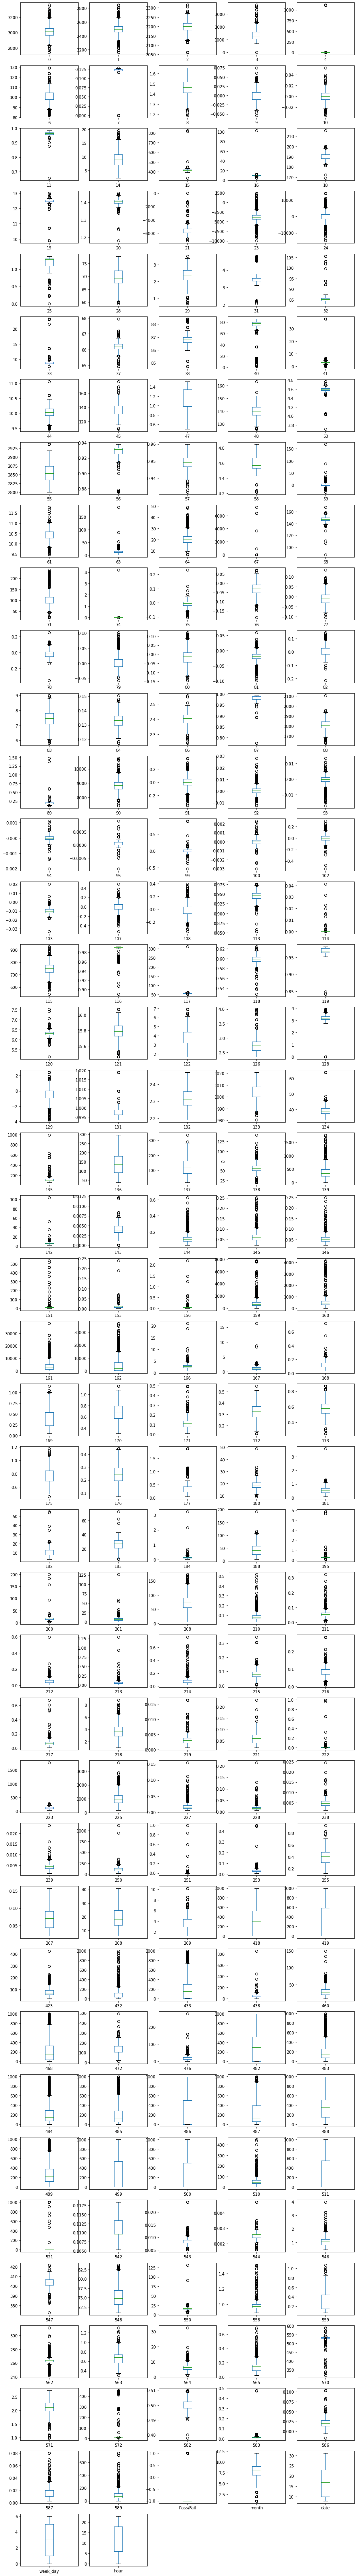

In [19]:
data.plot(kind='box', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));

**Observation** - 
- Dealing with outlier would be challenging as none of features are named and lack of domain knowledge.

###### 3.Low standard deviation

In [20]:
threshold = 0.2
data.drop(data.std()[data.std() < threshold].index.values, axis=1)

,0,1,2,3,4,6,14,15,16,18,19,21,23,24,28,29,31,32,33,37,38,40,41,45,48,55,59,61,63,64,67,68,71,83,88,90,115,117,122,126,128,129,133,134,135,136,137,138,139,142,151,159,160,161,162,166,167,177,180,181,182,183,188,195,200,201,208,218,223,225,250,268,269,418,419,423,432,433,438,460,468,472,476,482,483,484,485,486,487,488,489,499,500,510,511,521,546,547,548,550,559,562,564,570,571,572,589,Pass/Fail,month,date,week_day,hour
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,7.955800,414.871000,10.043300,192.396300,12.5190,-5419.00,-4043.75,751.00,64.2333,2.0222,3.5191,83.3971,9.5126,66.3141,86.9555,61.29,4.515,130.3691,141.2282,2834.0,-1.7264,10.6231,16.1445,21.7264,0.9226,148.6009,84.0793,7.2163,1747.6049,8671.930100,748.6115,58.4306,2.63900,3.353000,3.188000,-0.047300,1000.726300,39.237300,123.0,111.3,75.2,46.2000,350.6710,6.78,10.284000,1017.0,967.0,1066.0,368.0,2.0,0.9,0.160,20.95,0.333,12.49,16.713,65.363,0.292,10.30,5.38,97.314,3.4789,175.2173,1940.399400,219.9453,40.855000,4.515200,525.096500,0.000000,53.684000,26.3617,49.0013,44.5055,29.9394,311.6377,63.7987,31.9893,613.306900,291.484200,494.699600,178.175900,843.113800,0.000000,53.109800,0.000000,0.0000,0.0000,64.6707,0.0000,0.0,1.0616,395.570,75.752,12.93,0.4385,262.729683,6.444985,533.8500,2.1113,8.95,99.670066,-1,7,19,5,11
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,10.154800,414.734700,9.259900,191.287200,12.4608,-5441.50,-3498.75,-1640.25,68.4222,2.2667,3.4171,84.9052,9.7997,64.9193,87.5241,78.25,2.773,133.1727,145.8445,2853.0,0.8073,10.3092,10.9036,19.1927,1.1598,154.3709,82.3494,6.8043,1931.6464,8407.029900,731.2517,58.6680,2.54100,2.771000,3.272000,-0.094600,998.108100,37.921300,98.0,80.3,81.0,56.2000,219.7679,5.70,13.077000,568.0,59.0,297.0,3277.0,2.2,1.1,0.325,17.99,0.439,10.14,16.358,82.986,0.222,8.02,3.74,134.250,3.9578,128.4285,1988.000000,193.0287,29.743000,3.632700,0.000000,368.971300,61.891800,8.4887,199.7866,48.5294,40.4475,463.2883,73.5536,30.8643,0.000000,246.776200,0.000000,359.044400,130.635000,820.790000,194.437100,0.000000,0.0000,0.0000,141.4365,0.0000,0.0,1.3526,408.798,74.640,16.00,0.1745,262.729683,6.444985,535.0164,2.4335,5.92,208.204500,-1,7,19,5,12
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,9.515700,416.707500,9.314400,192.703500,12.5404,-5447.75,-4047.00,-1916.50,67.1333,2.3333,3.5986,84.7569,8.6590,65.8389,84.7327,14.37,5.434,131.8027,141.0845,2936.0,23.8245,10.1685,11.3019,16.1755,0.8694,145.8000,84.7681,7.1041,1685.8514,9317.169800,718.5777,58.4808,2.88200,3.094000,3.272000,-0.189200,998.444000,42.057900,89.0,126.4,96.5,45.1001,306.0380,8.33,8.443000,562.0,788.0,759.0,2100.0,2.1,1.4,0.326,17.78,0.745,13.31,22.912,60.110,0.139,16.73,5.09,79.618,2.4266,182.4956,839.600600,104.4042,29.621000,3.913300,0.000000,0.000000,50.642500,18.7546,109.5747,60.0000,32.3594,21.3645,148.0287,13.3923,434.267400,151.766500,0.000000,190.386900,746.915000,74.074100,191.758200,250.174200,0.0000,0.0000,240.7767,244.2748,0.0,0.7942,411.136,74.654,16.16,0.3718,267.064000,1.100000,535.0245,2.0293,11.21,82.860200,1,7,19,5,13
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,9.605200,422.289400,9.692400,192.155700,12.4782,-5468.25,-4515.00,-1657.25,62.9333,2.6444,3.3813,84.9105,8.6789,65.1951,86.6867,76.90,1.279,131.8027,142.5427,2936.0,24.3791,10.2112,13.5597,15.6209,0.9761,147.6545,70.2289,7.5925,1752.0968,8205.700000,709.0867,58.6635,3.13200,2.480000,3.119000,0.283800,980.451000,41.102500,127.0,118.0,123.7,47.8000,162.4320,5.51,15.241000,859.0,355.0,3433.0,3004.0,1.7,0.9,0.390,16.22,0.693,14.67,22.562,52.571,0.139,13.56,5.92,104.950,5.5398,152.0885,820.399900,94.0954,31.830000,3.195900,317.736200,0.000000,94.459400,76.0354,181.2641,34.0336,27.6824,24.2831,100.0021,35.4323,225.016900,100.488300,305.750000,88.555300,104.666000,71.758300,0.000000,336.766000,0.0000,711.6418,113.5593,0.0000,0.0,1.1650,372.822,72.442,131.68,0.7288,268.228000,7.320000,530.5682,2.0253,9.33,73.843200,-1,7,19,5,14
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,1

**Observation** - 
- We could also drop other columns based on low standard deviation.
- Since the name of the columns are not provided and lack of domain knowledge, its difficult to eliminate other columns

#### 3. Data analysis & visualisation:

##### A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

In [21]:
def draw_histograms(data, features, n_rows, n_cols):
    fig=plt.figure(figsize=(20,10))
    for i, var_name in enumerate(features):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        data[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

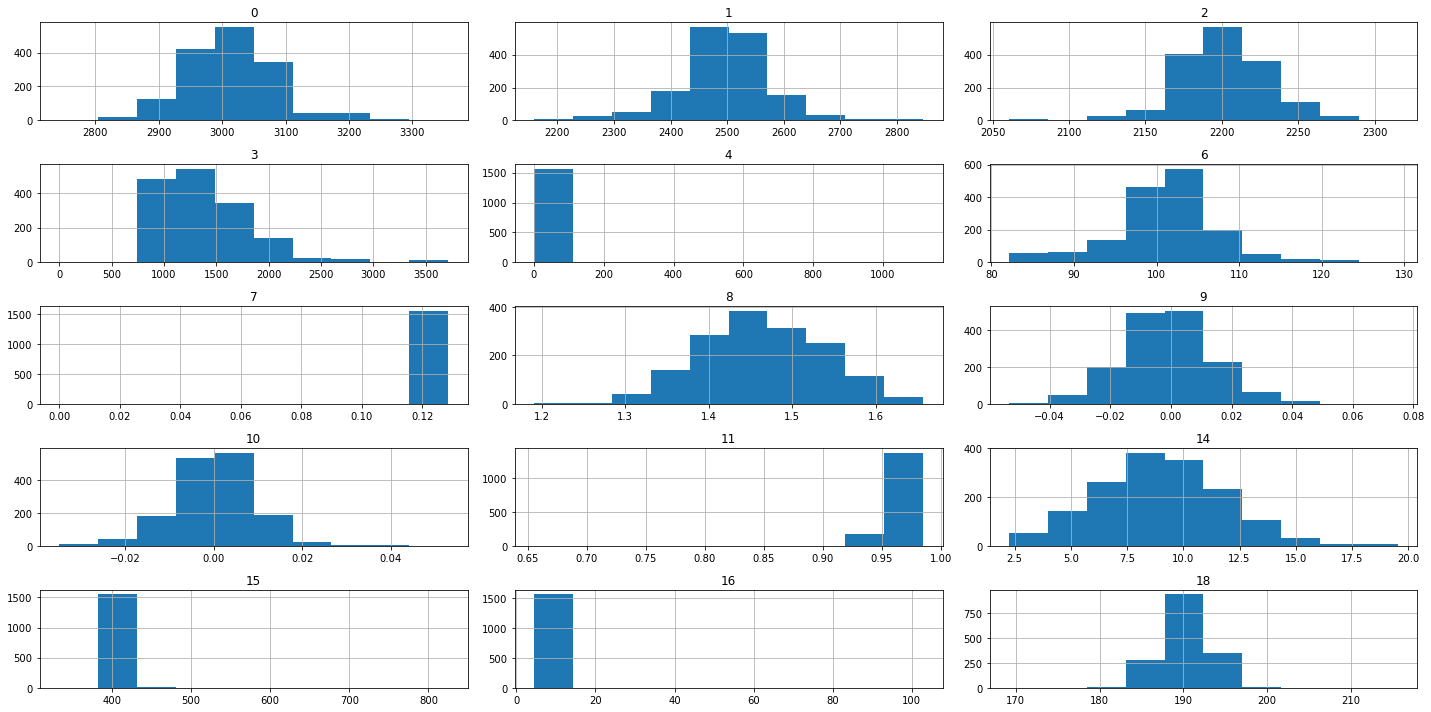

In [22]:
draw_histograms(data, data.iloc[:,0:15], 5,3)

**Observation** - 
- Most the features are **normally distributed**.
- Some of the feature distribution have **intervals and skewed towards right**
- Since the name of the columns are not provided and **lack of domain knowledge**, its difficult to analyze

##### B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [23]:
data.rename(columns = {'Pass/Fail':'Pass_Fail'}, inplace = True)

Note - We will check for class imbalance later

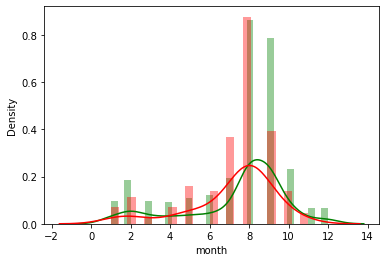

In [24]:
#Pass
sns.distplot(data[data.Pass_Fail == -1]['month'], color = 'g');

#fail
sns.distplot(data[data.Pass_Fail == 1]['month'], color = 'r');

**Pass** 
- Pass seems to be more in the month of *August* and *September*.
- Pass seems to be least in the month of *November* and *December*.

**Fail** -
- Fail seems to be more in the month of *August* , *July* and *September*
- Fail seems to be least in the month of *December*, *November*  and *March* 

**Observation** 
- *August* seems to be peak for both Pass and Fail
- Fail > Pass in the month of *May* , *July* , *July* and *August*  
- Pass seems to be almost double the fail in *September*

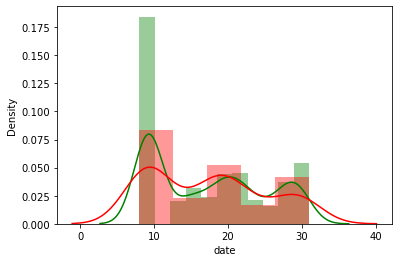

In [25]:
#Pass
sns.distplot(data[data.Pass_Fail == -1]['date'], color = 'g');

#Fail
sns.distplot(data[data.Pass_Fail == 1]['date'], color = 'r');

**Observation** -
- Around 8-10th day, pass seems to be almost double the fail.
- Pass and Fail are in close sync in middle of the month.
- Fail seems to decrease at the end of the month.

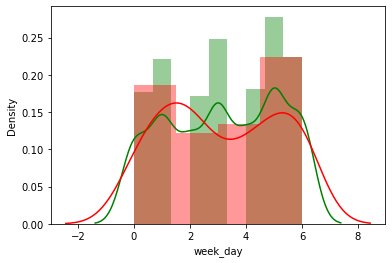

In [26]:
#Pass
sns.distplot(data[data.Pass_Fail == -1]['week_day'], color = 'g');

#Fail
sns.distplot(data[data.Pass_Fail == 1]['week_day'], color = 'r');

#NOTE: 0=Sun, 1=Mon, 2=Tues, 3=Wed, 4=Thur, 5=Fri and 6=Sat

**Observation** -
- Fail seems to be more towards start and end of the week rather than in the middle of the week.

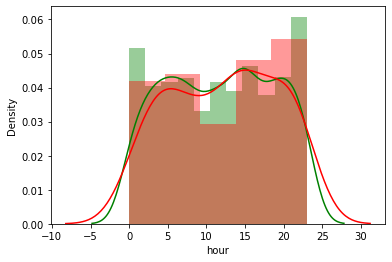

In [27]:
#pass
sns.distplot(data[data.Pass_Fail == -1]['hour'], color = 'g');

#Fail
sns.distplot(data[data.Pass_Fail == 1]['hour'], color = 'r');

**Observation** -
- There is no specific trend in terms of hours, it seems to be fairly distributed

In [28]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


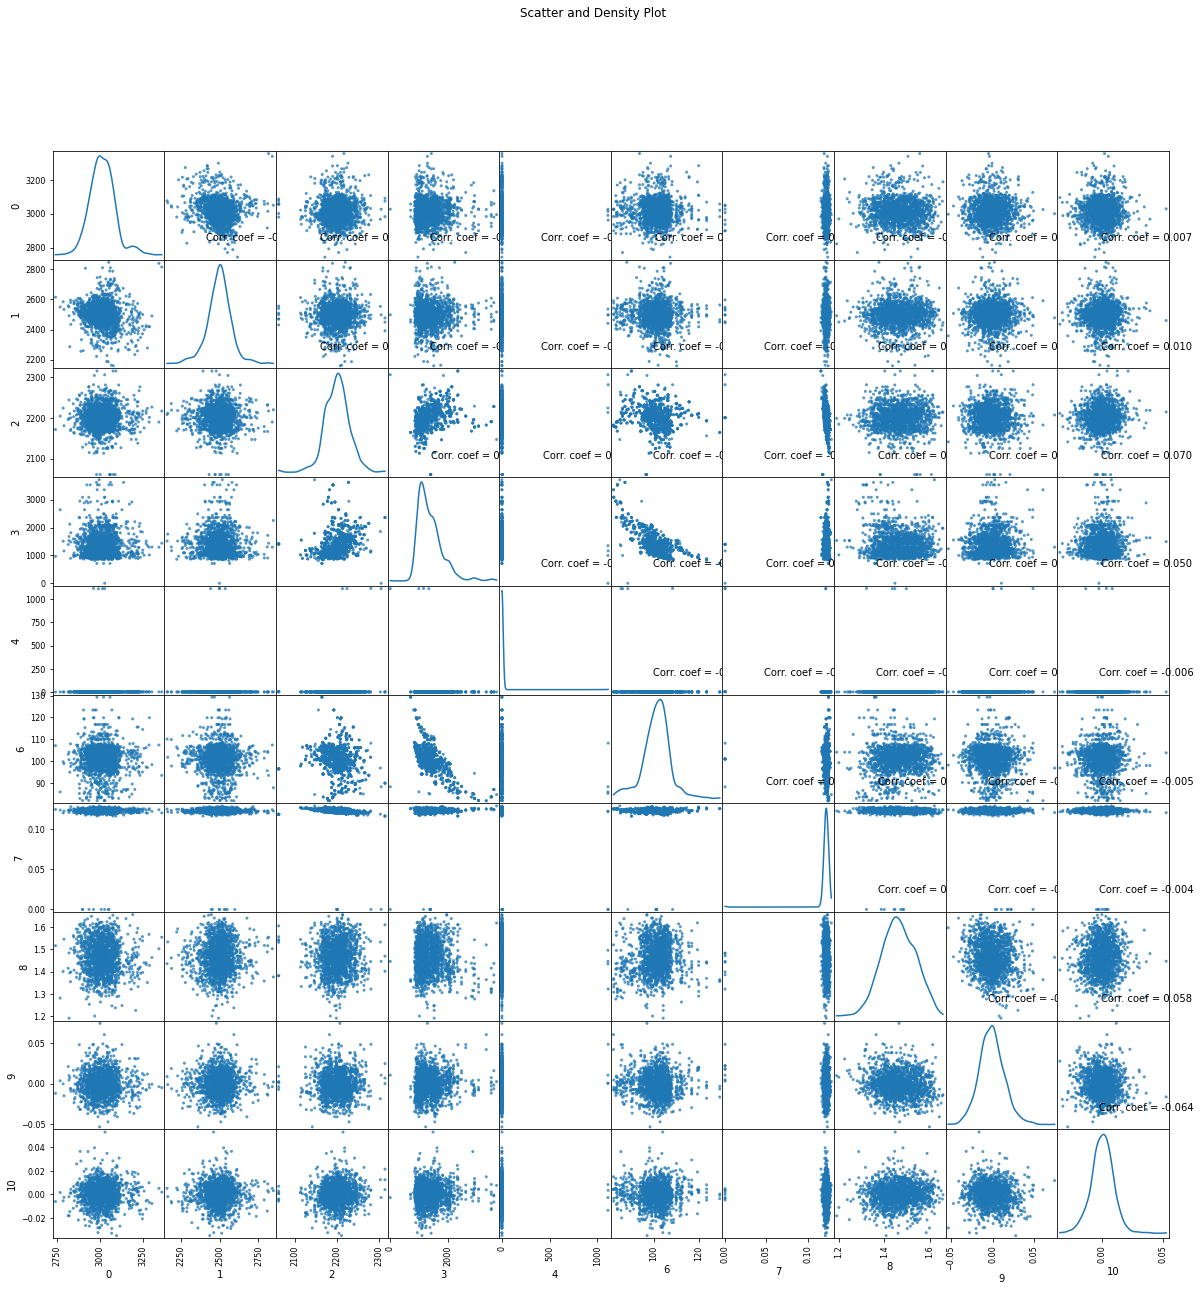

In [29]:
plotScatterMatrix(data, 20, 10)

These explorations help us understand the profile of the facility but do not provide significant insight into why a semiconductor failed in the production cyle.The distribution of success to failure follows the same distribution whether we analyse it hourly/daily/monthly or over the period of the entire year of 2008.Therefore we will drop these features.

In [30]:
data.drop(['month','date','week_day','hour'],axis=1,inplace=True )

#### 4. Data pre-processing:

##### A. Segregate predictors vs target attributes.

In [31]:
X = data.drop(['Pass_Fail'],axis=1)     
Y = data['Pass_Fail']

print(X.shape)
print(Y.shape)

(1567, 197)
(1567,)


##### B. Check for target balancing and fix it if found imbalanced.

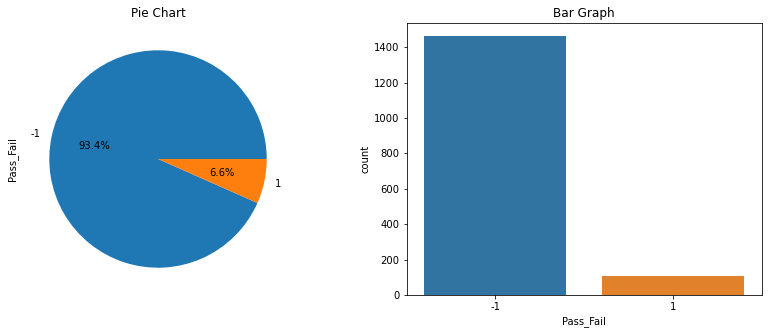

In [32]:
f,axes=plt.subplots(1,2,figsize=(14,5))
data['Pass_Fail'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Pass_Fail',data=data,ax=axes[1])
axes[0].set_title('Pie Chart')
axes[1].set_title('Bar Graph')
plt.show()

**Observation**:Imbalanced data

a) Class 1 : fail - 6.6%

b) Class -1 : pass - 93.4%

Approach to handling Imbalanced Data: **Resampling Techniques**

- **Random Undersampling** - aims to balance class distribution by randomly eliminating majority class examples. This is done until the majority and minority class instances are balanced out.

- **Random Oversampling** - increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

- Here we will use **Oversampling** because undersampling may remove important information from the dataset.

- To do that, one such technique is Synthetic Minority Oversampling Technique, or **SMOTE** for short.

In [33]:
snc=SMOTE(random_state=42)
X,Y=snc.fit_resample(X,Y)

print(X.shape)
print(Y.shape)

(2926, 197)
(2926,)


##### C. Perform train-test split and standardise the data or vice versa if required.

In [34]:
scaler = MinMaxScaler()
scaler.fit(X)
XScaled = X.copy()
XScaled[XScaled.columns] = scaler.fit_transform(X[X.columns])

In [35]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.25, random_state=1)

In [36]:
print("Before_SMOTE-fail Values : {0} ({1:0.2f}%)".format(len(data.loc[data['Pass_Fail'] == 1]), (len(data.loc[data['Pass_Fail'] == 1])/len(data.index)) * 100))
print("Before_SMOTE-pass Values : {0} ({1:0.2f}%)".format(len(data.loc[data['Pass_Fail'] == -1]), (len(data.loc[data['Pass_Fail'] == -1])/len(data.index)) * 100))
print("")
print("After_SMOTE-Training-fail Values : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("After_SMOTE-Training-pass Values : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == -1]), (len(y_train[y_train[:] == -1])/len(y_train)) * 100))
print("")
print("After_SMOTE-Test-fail Values : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("After_SMOTE-Test-pass Values : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == -1]), (len(y_test[y_test[:] == -1])/len(y_test)) * 100))
print("")

Before_SMOTE-fail Values : 104 (6.64%)
Before_SMOTE-pass Values : 1463 (93.36%)

After_SMOTE-Training-fail Values : 1101 (50.18%)
After_SMOTE-Training-pass Values : 1093 (49.82%)

After_SMOTE-Test-fail Values : 362 (49.45%)
After_SMOTE-Test-pass Values : 370 (50.55%)



##### D. Check if the train and test data have similar statistical characteristics when compared with original data.

In [37]:
XScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2926.0,0.431232,0.115591,0.0,0.354602,0.414998,0.496824,1.0
1,2926.0,0.489925,0.103476,0.0,0.434274,0.494298,0.545862,1.0
2,2926.0,0.548360,0.106821,0.0,0.476323,0.543346,0.610865,1.0
3,2926.0,0.370358,0.101328,0.0,0.297439,0.346870,0.424998,1.0
4,2926.0,0.001946,0.036878,0.0,0.000349,0.000567,0.000726,1.0
6,2926.0,0.403603,0.112109,0.0,0.351131,0.407885,0.462757,1.0
7,2926.0,0.948711,0.051509,0.0,0.941946,0.950456,0.960506,1.0
8,2926.0,0.595469,0.135833,0.0,0.510529,0.594051,0.687777,1.0
9,2926.0,0.402016,0.105284,0.0,0.335137,0.399442,0.462641,1.0
10,2926.0,0.399540,0.096396,0.0,0.344710,0.407281,0.459633,1.0


In [38]:
Y.describe()

count    2926.000000
mean        0.000000
std         1.000171
min        -1.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Pass_Fail, dtype: float64

**Observation** -
- We have balanced the data by oversampling. Hence count of rows have increased from 1561 to 2926.
- We have also reduced the number of features in Data cleaning Process (above).
- Scaled data using MinMaxScaler. All the features now have a minimum value of 0 and a maximum value of 1

#### 5. Model training, testing and tuning:

##### A. Use any Supervised Learning technique to train a model.

###### SVC

In [39]:
sv1 = svm.SVC()
svc1 = sv1.fit(x_train , y_train)
sv_pred1 = sv1.predict(x_test)

print('Accuracy on Training data:',sv1.score(x_train, y_train))
print('Accuracy on Test data:',sv1.score(x_test, y_test))

Accuracy on Training data: 0.9462169553327257
Accuracy on Test data: 0.9521857923497268


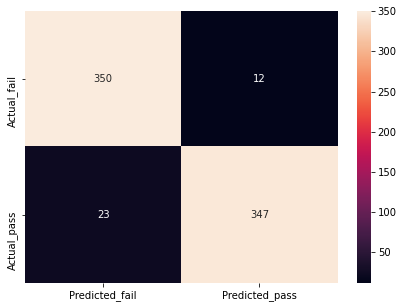

In [40]:
cm_s = metrics.confusion_matrix(y_test, sv_pred1, labels=[1,-1])

df_cm_s = pd.DataFrame(cm_s, index = [i for i in ["Actual_fail","Actual_pass"]],
                  columns = [i for i in ["Predicted_fail","Predicted_pass"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_s, annot=True ,fmt='g')
plt.show()

In [41]:
print("Classification Report")
print(metrics.classification_report(y_test, sv_pred1, labels=[1, -1]))

Classification Report
              precision    recall  f1-score   support

           1       0.94      0.97      0.95       362
          -1       0.97      0.94      0.95       370

    accuracy                           0.95       732
   macro avg       0.95      0.95      0.95       732
weighted avg       0.95      0.95      0.95       732



**Observation** -

**From Confusion Metrics** -

- True Positives (**TP**): we correctly predicted as fail - **350**

- True Negatives (**TN**): we correctly predicted as pass - **347**

- False Positives (**FP**): we incorrectly predicted as fail ("Type I error") - **23** 

- False Negatives (**FN**): we incorrectly predicted as pass ("Type II error") - **12**

**From Classification Report** -

1. **Accuracy** - our model is 95% accurate.


2. **Precision** - 
- **Fail(Class 1)** - 94%
- **Pass(Class -1)** - 97%
 
3. **Recall** - 
- **Fail(Class 1)** - 97%
- **Pass(Class -1)** - 94%

##### B. Use cross validation techniques.

##### a) k-fold cross validation( without stratification)

Usually k is set as 10 in practical settings, (depends on data set size)

In [42]:
num_folds = 10
seed = 77

kfold = KFold(n_splits=num_folds, random_state=seed)

results = cross_val_score(svc1,XScaled, Y, cv=kfold)
results

array([0.45051195, 0.71672355, 0.84641638, 0.72013652, 0.82593857,
       0.95904437, 0.96575342, 0.96232877, 0.96917808, 0.98287671])

In [43]:
print('Accuracy Score for k-fold cross validation(without stratification)')
print('Average: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score for k-fold cross validation(without stratification)
Average:  0.839890831735939
Standard deviation:  0.16234364828316541


##### b) Leave One Out Cross-Validation

In [44]:
#we will do it on x_train, y_train to save time. It will take too much time, hence not recommended for bigger data
scores = cross_val_score(svc1, x_train, y_train, cv=LeaveOneOut(), scoring='accuracy')
scores

array([1., 1., 1., ..., 1., 1., 1.])

In [45]:
print('Accuracy Score for Leave One Out Cross-Validation')
print('Average: ', scores.mean())
print('Standard deviation: ', scores.std())

Accuracy Score for Leave One Out Cross-Validation
Average:  0.9257064721969006
Standard deviation:  0.2622479733566486


###### c) k-fold cross validation with stratification

In [46]:
k = 10

stratified_kfold = StratifiedKFold(n_splits = k, random_state = 55)
results = cross_val_score(svc1, XScaled, Y, cv = stratified_kfold)

In [47]:
print('Accuracy Score for k-fold cross validation with stratification')
print('Average: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score for k-fold cross validation with stratification
Average:  0.8897061573706111
Standard deviation:  0.11194653100279477


##### d) Bootstrapping

Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement).
Create a model with each bootstrap sample and validate it with the test set.
Final result is calculated by averaging the accuracy of models

In [48]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

for i in range(bootstrap_iteration):
    x_, y_ = resample(x_train, y_train)
    svc1.fit(x_, y_)
    y_pred = svc1.predict(x_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [49]:
accuracy = np.array(accuracy)
print('Accuracy Score for Bootstrapping')
print('Average: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score for Bootstrapping
Average:  0.9340163934426229
Standard deviation:  0.007230119465791948


**Observation** - Although we have good results from LOOCV and Bootstrap, it is very time consuming and used when data is limited. Hence we will use crossfold validation with stratification which gives better result.

##### C. Apply hyper-parameter tuning techniques to get the best accuracy.

##### a. GridSearchCV with cv=stratified_kfold

In [50]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree':[3,4,5], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,verbose=1,scoring='accuracy',n_jobs=-1,cv=stratified_kfold)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 11.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=55, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [3, 4, 5],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [51]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [52]:
# use the best hyperparameters
#Train a Supervised Learning Classification base model - SVM
sv_hp2 = svm.SVC(C=1,gamma=1,kernel ='rbf', degree=3)
sv_hp2.fit(x_train, y_train)
sv_hp_pred2 = sv_hp2.predict(x_test)

print('Accuracy on Training data:',sv_hp2.score(x_train, y_train))
print('Accuracy on Test data:',sv_hp2.score(x_test, y_test))

Accuracy on Training data: 1.0
Accuracy on Test data: 1.0


**Observation** - The GridsearchCV shows the C=1 and Kernel = 'rbf' as best hyper parameters, which happen to be the default value. However, by using degree=3 and gamma=1, we get a accuracy of 100%

##### b. RandomizedSearchCV with cv=stratified_kfold

In [53]:
param_grid = {'C':np.arange( 1, 100+1, 1 ).tolist(),
              'kernel':['linear', 'rbf','poly', 'sigmoid'],
              'degree':np.arange( 0, 100+0, 1 ).tolist(),
              'gamma':np.arange( 0.0, 10.0+0.0, 0.1 ).tolist(),
             }
grid = RandomizedSearchCV(SVC(),param_grid,verbose=1,scoring='accuracy',n_jobs=-1,cv=stratified_kfold)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.4s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=55, shuffle=False),
                   estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...],
                                        'degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...],
                                        'gamma': [0.0, 0.1, 0.2,
                                                  0.30000000000000004, 0.4, 0.5,
                                                  0.6000000000000001,
                                

In [54]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'kernel': 'rbf', 'gamma': 0.9, 'degree': 69, 'C': 44}
SVC(C=44, degree=69, gamma=0.9)


In [55]:
# use the best hyperparameters
#Train a Supervised Learning Classification base model - SVM

sv_hp3 = svm.SVC(C=44,gamma=0.9,kernel='rbf',degree=69)
sv_hp3.fit(x_train, y_train)
sv_hp_pred3 = sv_hp3.predict(x_test)

print('Accuracy on Training data:',sv_hp3.score(x_train, y_train))
print('Accuracy on Test data:',sv_hp3.score(x_test, y_test))

Accuracy on Training data: 1.0
Accuracy on Test data: 1.0


##### D. Use any other technique/method which can enhance the model performance.

###### Apply PCA on the data

###### Covariance Matrix

In [56]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 0.01336139 -0.00206728  0.00064514 ...  0.00027039 -0.00055398
  -0.0003219 ]
 [-0.00206728  0.01070737 -0.00017239 ...  0.00015233  0.00106935
   0.00108612]
 [ 0.00064514 -0.00017239  0.01141069 ... -0.00056069 -0.00112305
  -0.00068444]
 ...
 [ 0.00027039  0.00015233 -0.00056069 ...  0.00852849  0.00227658
  -0.00497509]
 [-0.00055398  0.00106935 -0.00112305 ...  0.00227658  0.01147099
   0.00432098]
 [-0.0003219   0.00108612 -0.00068444 ... -0.00497509  0.00432098
   0.01182058]]


###### PCA with 10 components.

In [57]:
pca = PCA(n_components=10)
pca.fit(XScaled)

PCA(n_components=10)

###### The eigen Values

In [58]:
print(pca.explained_variance_)

[0.16872717 0.12311115 0.1163468  0.10259778 0.09920536 0.0935945
 0.08580762 0.07966776 0.07543833 0.07158596]


##### The eigen Vectors

In [59]:
print(pca.components_)

[[-0.07784398  0.01352751  0.01824697 ... -0.03373919  0.02677327
   0.04623877]
 [-0.00741545  0.03793098 -0.03718412 ...  0.01165541  0.05014856
   0.01658901]
 [ 0.02185338 -0.00358974  0.01649253 ... -0.00095542 -0.0052615
   0.01475228]
 ...
 [-0.00314187  0.02247235 -0.01984402 ... -0.01965482  0.00774318
  -0.00028408]
 [-0.00921341 -0.00553134 -0.02687462 ... -0.00780943  0.02908924
   0.02519432]
 [ 0.02514676 -0.01582758  0.00627429 ...  0.01467501 -0.01118449
  -0.02627638]]


###### Percentage of variation explained by each eigen Vector

In [60]:
print(pca.explained_variance_ratio_)

[0.05512978 0.04022524 0.03801506 0.03352271 0.03241428 0.03058099
 0.02803671 0.02603058 0.02464866 0.02338994]


##### Plot the same

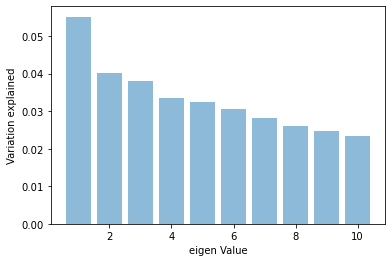

In [61]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

###### Visualize Cumulative Variance Explained with Number of Components.

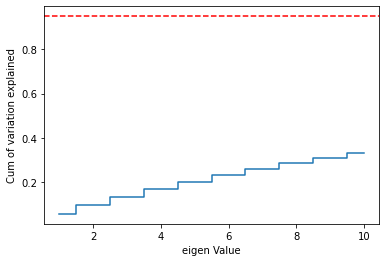

In [62]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.axhline(y = 0.95, color = 'r', linestyle = '--')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

**Observation** - PCA is used mainly for features which are strongly correlated. Since we have already removed the features with high collinearity, PCA does not work well to reduce data. In general, if most of the correlation coefficients are smaller than 0.3, PCA will not help.

##### E. Display and explain the classification report in detail. (after finding best Cross Validation method and hyper parameters using GridSearchCV) 

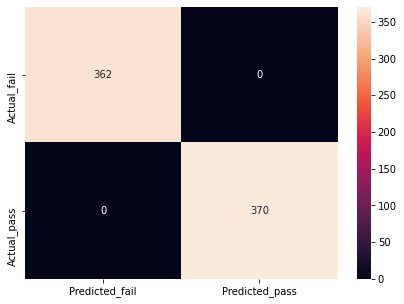

In [63]:
cm_s = metrics.confusion_matrix(y_test, sv_hp_pred2, labels=[1,-1])

df_cm_s = pd.DataFrame(cm_s, index = [i for i in ["Actual_fail","Actual_pass"]],
                  columns = [i for i in ["Predicted_fail","Predicted_pass"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_s, annot=True ,fmt='g')
plt.show()

In [64]:
print("Classification Report")
print(metrics.classification_report(y_test, sv_hp_pred2, labels=[1, -1]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       362
          -1       1.00      1.00      1.00       370

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



**Observation** -

**From Confusion Metrics** -

- True Positives (**TP**): we correctly predicted as fail - **362**

- True Negatives (**TN**): we correctly predicted as pass - **370**

- False Positives (**FP**): we incorrectly predicted as pass ("Type I error") - **0** 

- False Negatives (**FN**): we incorrectly predicted as fail ("Type II error") - **0**


1. **Accuracy** - our model is 100% accurate.


2. **Precision** - 
- **Fail (Class 1)** - 100%
- **Pass (Class -1)** - 100%
 
3. **Recall** - 
- **Fail (Class 1)** - 100%
- **Pass (Class -1)** - 100%

##### F. Apply the above steps for all possible models that you have learnt so far.

###### a) We will try it without Coss Validation and Hyper parameter (Traditional method)

In [65]:
classifiers = [['Logistic Regression :', LogisticRegression()],
               ['Naive Bayes :', GaussianNB()],
               ['KNN :', KNeighborsClassifier()],
               ['Decision Tree :', DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['XGBClassifier :', XGBClassifier(eval_metric='mlogloss')]]

In [66]:
for name,classifier in classifiers:
    clf=classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    print(f'\n {name} \n')
    print(f'Training Score for {name}  {clf.score(x_train,y_train) * 100:.2f}' )
    print(f'Testing Score for {name} {clf.score(x_test,y_test) * 100:.2f}' )
    print(f'Classification report  \n {classification_report(y_test,y_pred)}' )
    print(f'Confusion matrix  \n {confusion_matrix(y_test,y_pred)}' )
    print(f'ROC AUC  : {roc_auc_score(y_test,y_pred)}' )



 Logistic Regression : 

Training Score for Logistic Regression :  88.47
Testing Score for Logistic Regression : 86.61
Classification report  
               precision    recall  f1-score   support

          -1       0.91      0.81      0.86       370
           1       0.83      0.92      0.87       362

    accuracy                           0.87       732
   macro avg       0.87      0.87      0.87       732
weighted avg       0.87      0.87      0.87       732

Confusion matrix  
 [[300  70]
 [ 28 334]]
ROC AUC  : 0.8667313722562341

 Naive Bayes : 

Training Score for Naive Bayes :  72.93
Testing Score for Naive Bayes : 72.40
Classification report  
               precision    recall  f1-score   support

          -1       0.92      0.50      0.65       370
           1       0.65      0.95      0.77       362

    accuracy                           0.72       732
   macro avg       0.78      0.73      0.71       732
weighted avg       0.78      0.72      0.71       732

Confusi

**Observation** - Random forest and XGBClassifier gives the best accuracy.

##### b) Lets try with PCA and CV = stratified_kfold (Using Pipeline)

In [67]:
#LogisticRegression()
pipe_lr = Pipeline([('pca', PCA(n_components=10)), ('lr', LogisticRegression(random_state=1))]) 
pipe_lr.fit(x_train,y_train) 
print('Accuracy on Train data for Logistic Regression: %.4f' % pipe_lr.score(x_train, y_train))
print('Accuracy on Test data for Logistic Regression: %.4f' % pipe_lr.score(x_test, y_test))
results = cross_val_score(pipe_lr, XScaled, Y, cv=stratified_kfold)
print("CV Accuracy - Logistic Regression: %.4f (%.4f)" % (results.mean(), results.std()))
print()

#Naive Bayes()
pipe_nb = Pipeline([('pca', PCA(n_components=10)), ('nb', GaussianNB())]) 
pipe_nb.fit(x_train,y_train) 
print('Accuracy on Train data for Naive Bayes: %.4f' % pipe_nb.score(x_train, y_train)) 
print('Accuracy on Test data for Naive Bayes: %.4f' % pipe_nb.score(x_test, y_test)) 
results = cross_val_score(pipe_nb, XScaled, Y, cv=stratified_kfold)
print("CV Accuracy - Naive Bayes: %.4f (%.4f)" % (results.mean(), results.std()))
print()

#KNN()
pipe_KNN = Pipeline([('pca', PCA(n_components=10)), ('KNN', KNeighborsClassifier())]) 
pipe_KNN.fit(x_train,y_train) 
print('Accuracy on Train data for KNN: %.4f' % pipe_KNN.score(x_train, y_train))
print('Accuracy on Test data for KNN: %.4f' % pipe_KNN.score(x_test, y_test)) 
results = cross_val_score(pipe_KNN, XScaled, Y, cv=stratified_kfold)
print("CV Accuracy - KNN: %.4f (%.4f)" % (results.mean(), results.std()))
print()

#DecisionTree()
pipe_dt = Pipeline([('pca', PCA(n_components=10)), ('dt', DecisionTreeClassifier(random_state=1))]) 
pipe_dt.fit(x_train,y_train)
print('Accuracy on Train data for Decision Tree: %.4f' % pipe_dt.score(x_train, y_train))
print('Accuracy on Test data for Decision Tree: %.4f' % pipe_dt.score(x_test, y_test)) 
results = cross_val_score(pipe_dt, XScaled, Y, cv=stratified_kfold)
print("CV Accuracy - Decision Tree: %.4f (%.4f)" % (results.mean(), results.std()))
print()

#RandomForest()
pipe_rf = Pipeline([('pca', PCA(n_components=10)), ('rf', RandomForestClassifier(n_estimators=50,random_state=1))]) 
pipe_rf.fit(x_train,y_train)
print('Accuracy on Train data for Random Forest: %.4f' % pipe_rf.score(x_train, y_train))
print('Accuracy on Test data for Random Forest: %.4f' % pipe_rf.score(x_test, y_test)) 
results = cross_val_score(pipe_rf, XScaled, Y, cv=stratified_kfold)
print("CV Accuracy - Random Forest: %.4f (%.4f)" % (results.mean(), results.std()))
print()

#XGBClassifier()
pipe_xgb = Pipeline([('pca', PCA(n_components=10)), ('xg',XGBClassifier(random_state=1,eval_metric='mlogloss'))]) 
pipe_xgb.fit(x_train, y_train) 
print('Accuracy on Train data for XG Boost: %.4f' % pipe_xgb.score(x_train, y_train))
print('Accuracy on Test data for XG Boost: %.4f' % pipe_xgb.score(x_test, y_test)) 
results = cross_val_score(pipe_xgb, XScaled, Y, cv=stratified_kfold)
print("CV Accuracy - XG Boost: %.4f (%.4f)" % (results.mean(), results.std()))
print()

Accuracy on Train data for Logistic Regression: 0.6495
Accuracy on Test data for Logistic Regression: 0.6407
CV Accuracy - Logistic Regression: 0.5921 (0.1168)

Accuracy on Train data for Naive Bayes: 0.6326
Accuracy on Test data for Naive Bayes: 0.6352
CV Accuracy - Naive Bayes: 0.5972 (0.1046)

Accuracy on Train data for KNN: 0.8911
Accuracy on Test data for KNN: 0.8525
CV Accuracy - KNN: 0.8135 (0.0768)

Accuracy on Train data for Decision Tree: 0.9927
Accuracy on Test data for Decision Tree: 0.8046
CV Accuracy - Decision Tree: 0.7653 (0.0492)

Accuracy on Train data for Random Forest: 0.9995
Accuracy on Test data for Random Forest: 0.8839
CV Accuracy - Random Forest: 0.8524 (0.0776)

Accuracy on Train data for XG Boost: 1.0000
Accuracy on Test data for XG Boost: 0.8784
CV Accuracy - XG Boost: 0.8435 (0.0793)



In [68]:
#Function to display confusion matrix
def disp_confusion_matrix(model_name, model, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    df_conf_mat = pd.DataFrame(conf_mat)
    #ax = plt.axes()
    #plt.title()
    plt.figure(figsize = (5,3))
    plt.suptitle("Confusion matrix: "+model_name)
    sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')
    #ax.set_title()
    #plt.show();

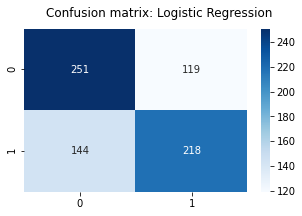

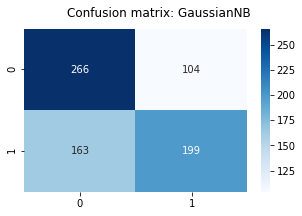

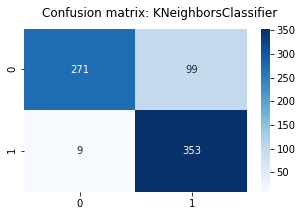

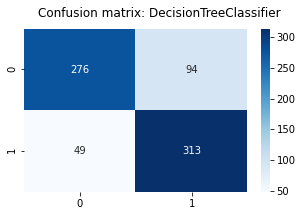

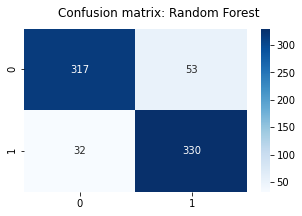

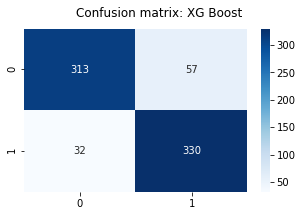

In [69]:
for model, model_name in zip([pipe_lr,pipe_nb,pipe_KNN,pipe_dt,pipe_rf, pipe_xgb], ['Logistic Regression','GaussianNB','KNeighborsClassifier','DecisionTreeClassifier','Random Forest','XG Boost']):
    disp_confusion_matrix(model_name, model, x_test, y_test);

 **Observation** - Random forest and XGBClassifier gives the best accuracy.

##### c) Lets try with PCA and CV = kfold (using pipeline)

In [70]:
#LogisticRegression()
pipe_lr2 = Pipeline([('pca2', PCA(n_components=10)), ('lr2', LogisticRegression(random_state=1))]) 
pipe_lr2.fit(x_train,y_train)
print('Accuracy on Train data for Logistic Regression: %.4f' % pipe_lr2.score(x_train, y_train))
print('Accuracy on Test data for Logistic Regression: %.4f' % pipe_lr2.score(x_test, y_test))
results2 = cross_val_score(pipe_lr2, XScaled, Y, cv=kfold)
print("CV Accuracy - Logistic Regression: %.4f (%.4f)" % (results2.mean(), results2.std()))
print()

#Naive Bayes()
pipe_nb2 = Pipeline([('pca2', PCA(n_components=10)), ('nb2', GaussianNB())]) 
pipe_nb2.fit(x_train,y_train)
print('Accuracy on Train data for Naive Bayes: %.4f' % pipe_nb2.score(x_train, y_train))
print('Accuracy on Test data for Naive Bayes: %.4f' % pipe_nb2.score(x_test, y_test)) 
results2 = cross_val_score(pipe_nb2, XScaled, Y, cv=kfold)
print("CV Accuracy - Naive Bayes: %.4f (%.4f)" % (results2.mean(), results2.std()))
print()

#KNN()
pipe_KNN2 = Pipeline([('pca2', PCA(n_components=10)), ('KNN2', KNeighborsClassifier())]) 
pipe_KNN2.fit(x_train,y_train)
print('Accuracy on Train data for KNN: %.4f' % pipe_KNN2.score(x_train, y_train))
print('Accuracy on Test data for KNN: %.4f' % pipe_KNN2.score(x_test, y_test)) 
results2 = cross_val_score(pipe_KNN2, XScaled, Y, cv=kfold)
print("CV Accuracy - KNN: %.4f (%.4f)" % (results2.mean(), results2.std()))
print()

#DecisionTree()
pipe_dt2 = Pipeline([('pca2', PCA(n_components=10)), ('dt2', DecisionTreeClassifier(random_state=1))]) 
pipe_dt2.fit(x_train,y_train)
print('Accuracy on Train data for Decision Tree: %.4f' % pipe_dt2.score(x_train, y_train))
print('Accuracy on Test data for Decision Tree: %.4f' % pipe_dt2.score(x_test, y_test)) 
results2 = cross_val_score(pipe_dt2, XScaled, Y, cv=kfold)
print("CV Accuracy - Decision Tree: %.4f (%.4f)" % (results2.mean(), results2.std()))
print()

#RandomForest()
pipe_rf2 = Pipeline([('pca2', PCA(n_components=10)), ('rf2', RandomForestClassifier(n_estimators=50,random_state=1))]) 
pipe_rf2.fit(x_train,y_train)
print('Accuracy on Train data for Random Forest: %.4f' % pipe_rf2.score(x_train, y_train)) 
print('Accuracy on Test data for Random Forest: %.4f' % pipe_rf2.score(x_test, y_test)) 
results2 = cross_val_score(pipe_rf2, XScaled, Y, cv=kfold)
print("CV Accuracy - Random Forest: %.4f (%.4f)" % (results2.mean(), results2.std()))
print()

#XGBClassifier()
pipe_xgb2 = Pipeline([('pca2', PCA(n_components=10)), ('xg2',XGBClassifier(random_state=1,eval_metric='mlogloss'))]) 
pipe_xgb2.fit(x_train, y_train) 
print('Accuracy on Train data for XG Boost: %.4f' % pipe_xgb2.score(x_train, y_train))
print('Accuracy on Test data for XG Boost: %.4f' % pipe_xgb2.score(x_test, y_test)) 
results2 = cross_val_score(pipe_xgb2, XScaled, Y, cv=kfold)
print("CV Accuracy - XG Boost: %.4f (%.4f)" % (results2.mean(), results2.std()))
print()

Accuracy on Train data for Logistic Regression: 0.6449
Accuracy on Test data for Logistic Regression: 0.6421
CV Accuracy - Logistic Regression: 0.4816 (0.1364)

Accuracy on Train data for Naive Bayes: 0.6304
Accuracy on Test data for Naive Bayes: 0.6380
CV Accuracy - Naive Bayes: 0.5157 (0.1406)

Accuracy on Train data for KNN: 0.8883
Accuracy on Test data for KNN: 0.8456
CV Accuracy - KNN: 0.7747 (0.1972)

Accuracy on Train data for Decision Tree: 0.9945
Accuracy on Test data for Decision Tree: 0.7883
CV Accuracy - Decision Tree: 0.7397 (0.1240)

Accuracy on Train data for Random Forest: 1.0000
Accuracy on Test data for Random Forest: 0.8880
CV Accuracy - Random Forest: 0.7971 (0.1511)

Accuracy on Train data for XG Boost: 1.0000
Accuracy on Test data for XG Boost: 0.8757
CV Accuracy - XG Boost: 0.8019 (0.1488)



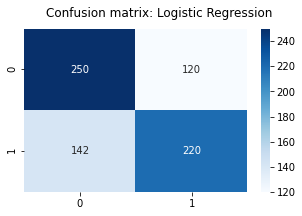

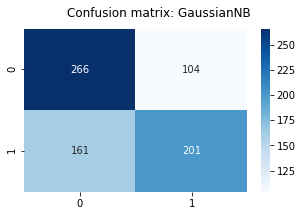

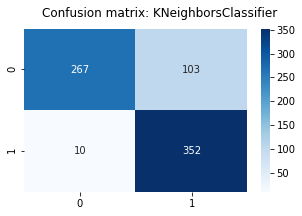

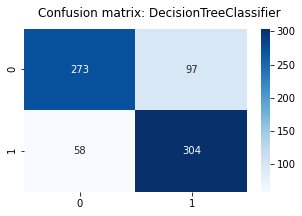

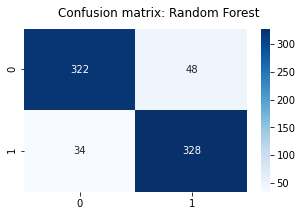

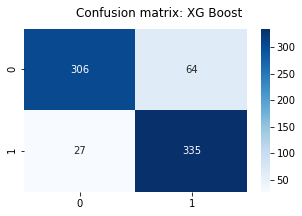

In [71]:
for model, model_name in zip([pipe_lr2,pipe_nb2,pipe_KNN2,pipe_dt2,pipe_rf2, pipe_xgb2], ['Logistic Regression','GaussianNB','KNeighborsClassifier','DecisionTreeClassifier','Random Forest','XG Boost']):
    disp_confusion_matrix(model_name, model, x_test, y_test);

 **Observation** - 
 - Random forest and XGBClassifier gives the best accuracy
 - Also cv=stratified_kfold gives better results for all the models than cv=kfold. Therefore we will use cv=stratified_kfold

##### d) Lets try hyper parameters for Random forest and XGBClassifier since both the models have better accuracy using stratified_kfold (using makepipeline)

In [72]:
# Create a pipeline for RandomForestClassifier 
pipe3 = make_pipeline((RandomForestClassifier()))

# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param3 = [
                {"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__max_depth":[3,5,8,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10],
                 "randomforestclassifier__min_samples_split":[2,3,10],
                 "randomforestclassifier__max_features":[1,3,5],
                 "randomforestclassifier__criterion":["gini","entropy"],
                 "randomforestclassifier__bootstrap":[True,False]}]

# create a gridsearch of the pipeline, to fit the best model
gridsearch3 = GridSearchCV(pipe3, grid_param3, cv=stratified_kfold, verbose=0,n_jobs=-1)
best_model3 = gridsearch3.fit(x_train,y_train)

In [73]:
print("The mean accuracy of the RandomForestClassifier model is:",best_model3.score(x_test,y_test))

The mean accuracy of the RandomForestClassifier model is: 0.9986338797814208


In [74]:
# Create a pipeline for XGBClassifier
pipe4 = make_pipeline((XGBClassifier()))

# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param4 = [
                {"xgbclassifier": [XGBClassifier()],
                 "xgbclassifier__max_depth":[3,5,8,None],
                 "xgbclassifier__learning_rate":[0.1,0.01,0.05],
                 "xgbclassifier__gamma":[0,0.25,1],
                 "xgbclassifier__reg_lambda":[0,1,10],
                 "xgbclassifier__scale_pos_weight":[1,3,5]}]

# create a gridsearch of the pipeline, to fit the best model
gridsearch4 = GridSearchCV(pipe4, grid_param4, cv=stratified_kfold, verbose=0,n_jobs=-1)
best_model4 = gridsearch4.fit(x_train,y_train)

[22:49:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [75]:
print("The mean accuracy of the XGBClassifier model is:",best_model4.score(x_test,y_test))

The mean accuracy of the XGBClassifier model is: 0.9754098360655737


#### 6. Post Training and Conclusion:

##### A. Display and compare all the models designed with their train and test accuracies.


###### a) Results of  Traditional method

In [76]:
for name,classifier in classifiers:
    clf=classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    print(f'Training Score for {name} {clf.score(x_train,y_train) * 100:.2f}' )
    print(f'Testing Score for {name} {clf.score(x_test,y_test) * 100:.2f}' )

Training Score for Logistic Regression : 88.47
Testing Score for Logistic Regression : 86.61
Training Score for Naive Bayes : 72.93
Testing Score for Naive Bayes : 72.40
Training Score for KNN : 65.45
Testing Score for KNN : 57.38
Training Score for Decision Tree : 100.00
Testing Score for Decision Tree : 89.34
Training Score for RandomForest : 100.00
Testing Score for RandomForest : 99.45
Training Score for XGBClassifier : 100.00
Testing Score for XGBClassifier : 98.36


###### b) Results of PCA and CV = stratified_kfold

In [77]:
pipelines1 = [pipe_lr,pipe_nb,pipe_KNN,pipe_dt,pipe_rf, pipe_xgb]
pipe_dict1 = {0: 'Logistic Regression', 1: 'Naive Bayes', 2: 'KNN', 3: 'Decision Tree', 4: 'RandomForest', 5:'XGBClassifier'}

best_accuracy1=0.0
best_classifier1=0
best_pipeline1=""

In [78]:
for i,model in enumerate(pipelines1):
    print("{} Train Accuracy: {}".format(pipe_dict1[i],model.score(x_train,y_train)))
    print("{} Test Accuracy: {}".format(pipe_dict1[i],model.score(x_test,y_test)))

Logistic Regression Train Accuracy: 0.6494986326344576
Logistic Regression Test Accuracy: 0.6407103825136612
Naive Bayes Train Accuracy: 0.6326344576116681
Naive Bayes Test Accuracy: 0.6352459016393442
KNN Train Accuracy: 0.8910665451230629
KNN Test Accuracy: 0.8524590163934426
Decision Tree Train Accuracy: 0.9927073837739289
Decision Tree Test Accuracy: 0.8046448087431693
RandomForest Train Accuracy: 0.9995442114858706
RandomForest Test Accuracy: 0.8838797814207651
XGBClassifier Train Accuracy: 1.0
XGBClassifier Test Accuracy: 0.8784153005464481


In [79]:
for i,model in enumerate(pipelines1):
    if model.score(x_test,y_test)>best_accuracy1:
        best_accuracy1=model.score(x_test,y_test)
        best_pipeline1=model
        best_classifier1=i
print('Classifier with best accuracy:{}'.format(pipe_dict1[best_classifier1]))

Classifier with best accuracy:RandomForest


##### c) Results of PCA and CV = kfold

In [80]:
pipelines2 = [pipe_lr2,pipe_nb2,pipe_KNN2,pipe_dt2,pipe_rf2, pipe_xgb2]
pipe_dict2 = {0: 'Logistic Regression', 1: 'Naive Bayes', 2: 'KNN', 3: 'Decision Tree', 4: 'RandomForest', 5:'XGBClassifier'}

best_accuracy2=0.0
best_classifier2=0
best_pipeline2=""

In [82]:
for i,model in enumerate(pipelines2):
    print("{} Train Accuracy: {}".format(pipe_dict2[i],model.score(x_train,y_train)))
    print("{} Test Accuracy: {}".format(pipe_dict2[i],model.score(x_test,y_test)))

Logistic Regression Train Accuracy: 0.6449407474931632
Logistic Regression Test Accuracy: 0.6420765027322405
Naive Bayes Train Accuracy: 0.6303555150410209
Naive Bayes Test Accuracy: 0.6379781420765027
KNN Train Accuracy: 0.8883318140382862
KNN Test Accuracy: 0.8456284153005464
Decision Tree Train Accuracy: 0.9945305378304466
Decision Tree Test Accuracy: 0.7882513661202186
RandomForest Train Accuracy: 1.0
RandomForest Test Accuracy: 0.8879781420765027
XGBClassifier Train Accuracy: 1.0
XGBClassifier Test Accuracy: 0.8756830601092896


In [83]:
for i,model in enumerate(pipelines2):
    if model.score(x_test,y_test)>best_accuracy2:
        best_accuracy2=model.score(x_test,y_test)
        best_pipeline2=model
        best_classifier2=i
print('Classifier with best accuracy:{}'.format(pipe_dict2[best_classifier2]))

Classifier with best accuracy:RandomForest


###### d) Results for Random forest and XGBClassifier with hyper parameters

In [84]:
print("The mean accuracy of the Random forest model is", best_model3.score(x_test,y_test))
      
print()

print("The mean accuracy of the XGBClassifier model is", best_model4.score(x_test,y_test))    

The mean accuracy of the Random forest model is 0.9986338797814208

The mean accuracy of the XGBClassifier model is 0.9754098360655737


##### B. Select the final best trained model along with your detailed comments for selecting this model.

Our Best models are 
- **SVM** - because we see almost 100% accuracy after tuning with hyperparameters.
- **Random Forest** - Gives us the accuracy of 100% after tuning with hyperparameters.
- **XGBClassifier**-  Gives us the accuracy as 97.5% after tuning with hyperparameters.

##### C. Pickle the selected model for future use.

In [85]:
#SVM
best_model_svm = sv_hp2
best_model_svm.fit(x_train,y_train)

#Save the trained model as a pickle string. 
saved_model_svm = pickle.dumps(best_model_svm) 

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model_svm, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(x_test)

Test score: 100.00 %


In [86]:
#Random Forest
best_model_rf = best_model3

#Save the trained model as a pickle string. 
saved_model_rf = pickle.dumps(best_model_rf) 

#Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model_rf, file)
    
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(x_test)

Test score: 99.86 %


In [87]:
#XGBClassifier
best_model_xgb = best_model4

#Save the trained model as a pickle string. 
saved_model_xgb = pickle.dumps(best_model_xgb) 

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model_xgb, file)
    
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(x_test)

Test score: 97.54 %


##### D. Write your conclusion on the results.

- Before training the model, **we have preprocessed the data** using several techniques such as - Imputing, removing features with 20%+ null values, removing high collinear features,droping the features with same value and oversampling the imbalanced data, all of these yielded 2926 rows and 198 features.
- **SVM Model had around 95% accuracy without considering cross validation and tuning hyper parameters.But the accuracy increased to 100% using gridsearchcv and cv=stratifiedkfold.**
- Since we had already removed the features with high collinearity, **PCA does not work well to reduce data**.
- Other trained models were - Logistic Regression, Naive Bayes, KNN, Decision Tree, RandomForest and XGBClassifier.
- In the above mentioned models, **RandomForest and XGBClassifier has better accuracies than other models**.
- **Although the accuracy of logistic model is less, Logistic was able to classify more observations in failure**.

----------------------------